In [21]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# # Any results you write to the current directory are saved as output.

In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/home/yaan_uchiha29/CrowdAI/'
width=256
height=256
depth=3

CATEGORIES = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust',
 'Apple___healthy','Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy', 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
 'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Corn_(maize)___Common_rust_ ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Grape___Esca_(Black_Measles) ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Potato___Late_blight ...
[INFO] Pr

In [6]:
image_size = len(image_list)

In [7]:
len(label_list)

7552

In [42]:
len(image_list[0])



256

In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [10]:
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [11]:
print (image_labels[7551])

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [12]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [13]:
np_image_list[0].shape

(256, 256, 3)

In [14]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Spliting data to train, test


In [15]:
print(len(x_train))
print(len(x_test))
# x_train = x_train[:2361]
# y_train = y_train[:2361]
# x_test = x_test[:591]
# y_test= y_test[:591]


6041
1511


In [16]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [18]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [19]:
NAME = "CrowdAI Classification modified-model(1) -epoch-6-{}".format(int(time.time())) #save each different model

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


# model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))

# model.add(Dense(1))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [20]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)        0         
__________

In [21]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [22]:
model.fit(x_train, y_train, batch_size=32, epochs=6, validation_split=0.3, callbacks=[tensorboard])

Train on 4228 samples, validate on 1813 samples
Epoch 1/6
4228/4228 [==============================] - 63s 15ms/step - loss: 0.0842 - acc: 0.9756 - val_loss: 0.5486 - val_acc: 0.9538
Epoch 2/6
4228/4228 [==============================] - 45s 11ms/step - loss: 0.0560 - acc: 0.9818 - val_loss: 0.0905 - val_acc: 0.9762
Epoch 3/6
4228/4228 [==============================] - 45s 11ms/step - loss: 0.0404 - acc: 0.9863 - val_loss: 0.1970 - val_acc: 0.9665
Epoch 4/6
4228/4228 [==============================] - 45s 11ms/step - loss: 0.0455 - acc: 0.9848 - val_loss: 0.0832 - val_acc: 0.9787
Epoch 5/6
4228/4228 [==============================] - 45s 11ms/step - loss: 0.0267 - acc: 0.9907 - val_loss: 0.0368 - val_acc: 0.9880
Epoch 6/6
4228/4228 [==============================] - 45s 11ms/step - loss: 0.0187 - acc: 0.9931 - val_loss: 0.0515 - val_acc: 0.9840


In [23]:
# history = model.fit_generator(
#     aug.flow(x_train, y_train, batch_size=BS),
#     validation_data=(x_test, y_test),
#     steps_per_epoch=len(x_train) // BS,
#     epochs=EPOCHS, verbose=1
#     )

In [24]:
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(acc) + 1)
# #Train and validation accuracy
# plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
# plt.title('Training and Validation accurarcy')
# plt.legend()

# plt.figure()
# #Train and validation loss
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and Validation loss')
# plt.legend()
# plt.show()

In [25]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1511/1511 [==============================] - 5s 3ms/step
Test Accuracy: 98.58755077611998


In [26]:
# save the model to disk
print("[INFO] Saving model...")
pickle.dump(model,open('cnn_model_all.pkl', 'wb'))

[INFO] Saving model...


In [27]:
#predicting individual
a= model.predict(x_test)

In [28]:

np.around(a[0], decimals=2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.  ], dtype=float32)

In [29]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

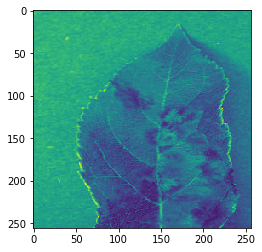

256

In [39]:
IMG_SIZE = 256
img_array = cv2.imread("/home/yaan_uchiha29/CrowdAI/color/Apple___Apple_scab/ff99efdc-a9f8-4360-9c64-f8274f456be5___FREC_Scab 3161.JPG", cv2.IMREAD_GRAYSCALE) #convert to grayscale array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #RESIZE MAGES
img_array = img_to_array(new_array)


plt.imshow(new_array)
plt.show()




In [31]:
# def prepare(filepath):
#     IMG_SIZE = 256  # 50 in txt-based
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

# prediction = model.predict(x_test[1])

In [32]:
y_train[0].shape

(38,)

In [33]:
img_array.shape

(256, 256)

In [34]:
y_test


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

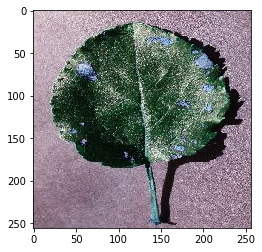

array([[[212., 194., 201.],
        [208., 190., 197.],
        [208., 190., 197.],
        [200., 182., 189.],
        [217., 199., 206.],
        [212., 194., 201.],
        [190., 172., 179.],
        [228., 210., 217.],
        [221., 203., 210.],
        [199., 181., 188.],
        [226., 208., 215.],
        [210., 192., 199.],
        [217., 199., 206.],
        [216., 198., 205.],
        [212., 194., 201.],
        [213., 197., 204.],
        [215., 198., 207.],
        [197., 182., 190.],
        [213., 198., 206.],
        [195., 180., 188.],
        [238., 223., 231.],
        [232., 217., 225.],
        [189., 174., 182.],
        [200., 185., 193.],
        [214., 199., 207.],
        [211., 196., 204.],
        [210., 195., 203.],
        [225., 210., 218.],
        [182., 167., 175.],
        [226., 211., 219.],
        [196., 181., 189.],
        [170., 155., 163.],
        [193., 174., 183.],
        [205., 186., 195.],
        [199., 180., 189.],
        [192., 173.,

In [87]:
IMG_SIZE = 256
img_array = cv2.imread("/home/yaan_uchiha29/CrowdAI/color/Apple___Black_rot/ff0f9b3a-4ef4-4c38-9a23-516beff99192___JR_FrgE.S 3048.JPG") 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #RESIZE MAGES
img_array = img_to_array(new_array)


plt.imshow(new_array)
plt.show()
img_array

In [89]:
np_image_test = np.array(img_array, dtype=np.float16) / 225.0
np_image_test.shape

(256, 256, 3)

In [90]:
#Expand dimension to predict the model in keras

np_image_test = np.expand_dims(np_image_test, axis=0)
np_image_test.shape

(1, 256, 256, 3)

In [95]:
a = model.predict(np_image_test)

np.around(a[0], decimals=2)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [96]:
a = model.predict_classes(np_image_test)
print('Image prediction - '+CATEGORIES[int(a)])

Image prediction - Apple___Black_rot


In [53]:
x_test[0]

array([[[0.68  , 0.676 , 0.6934],
        [0.7153, 0.711 , 0.729 ],
        [0.6978, 0.6934, 0.711 ],
        ...,
        [0.671 , 0.6665, 0.6846],
        [0.702 , 0.6978, 0.7153],
        [0.7065, 0.702 , 0.72  ]],

       [[0.6934, 0.689 , 0.7065],
        [0.72  , 0.7153, 0.7334],
        [0.7065, 0.702 , 0.72  ],
        ...,
        [0.689 , 0.6846, 0.702 ],
        [0.702 , 0.6978, 0.7153],
        [0.6978, 0.6934, 0.711 ]],

       [[0.68  , 0.676 , 0.6934],
        [0.6978, 0.6934, 0.711 ],
        [0.6978, 0.6934, 0.711 ],
        ...,
        [0.702 , 0.6978, 0.7153],
        [0.702 , 0.6978, 0.7153],
        [0.6846, 0.68  , 0.6978]],

       ...,

       [[0.4443, 0.4578, 0.48  ],
        [0.4712, 0.4844, 0.507 ],
        [0.48  , 0.4934, 0.5156],
        ...,
        [0.4355, 0.449 , 0.4712],
        [0.52  , 0.533 , 0.5557],
        [0.4355, 0.449 , 0.4712]],

       [[0.4534, 0.4666, 0.4888],
        [0.4712, 0.4844, 0.507 ],
        [0.4756, 0.4888, 0.511 ],
        .

In [57]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)
np_image_test.shape

(256, 256, 3)